In [1]:





from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np

In [2]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.altomfotball.no/element.do?cmd=tournamentTable&tournamentId=239&seasonId=341&useFullUrl=false')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table border="0" cellpadding="0" cellspacing="0" class="sd_table sd_sortable sd_sortabletable" id="sd_table_239" summary="Tabell">
<thead>
<tr>
<th class="sd_table_rank"><span> </span></th>
<th class="sd_table_team"><span>Lag</span></th>
<th title="Kamper"><span>K</span></th>
<th title="Vunnet"><span>V</span></th>
<th title="Uavgjorte"><span>U</span></th>
<th title="Tapte"><span>T</span></th>
<th title="Mål for"><span>+</span></th>
<th title="Mål mot"><span>-</span></th>
<th title="Målforskjell"><span>+/-</span></th>
<th class="sd_table_points" title="Poeng"><span>P</span></th>
<th class="sd_left">Siste Kamper</th>
</tr>
</thead>
<tbody>
<tr class="sd_table_up sd_odd">
<td class="sd_table_new">1.</td>
<td class="sd_table_team">
<a href="element.do?cmd=team&amp;teamId=944&amp;tournamentId=239&amp;seasonId=341&amp;useFullUrl=false">Bayern</a></td>
<td>34</td>
<td>26</td>
<td>4</td>
<td>4</td>
<td>100</td>
<td>32</td>
<td>+68</td>
<td class="sd_table_points">82</td>
<td class="sd_left" s

In [3]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'Lag', 'K', 'V', 'U', 'T', '+', '-', '+/-', 'P', 'Siste Kamper'], ['1.', 'Bayern', '34', '26', '4', '4', '100', '32', '+68', '82', ''], ['2.', 'Dortmund', '34', '21', '6', '7', '84', '41', '+43', '69', ''], ['3.', 'Leipzig', '34', '18', '12', '4', '81', '37', '+44', '66', ''], ['4.', "M'gladbach", '34', '20', '5', '9', '66', '40', '+26', '65', ''], ['5.', 'Leverkusen', '34', '19', '6', '9', '61', '44', '+17', '63', ''], ['6.', 'Hoffenheim', '34', '15', '7', '12', '53', '53', '0', '52', ''], ['7.', 'Wolfsburg', '34', '13', '10', '11', '48', '46', '+2', '49', ''], ['8.', 'Freiburg', '34', '13', '9', '12', '48', '47', '+1', '48', ''], ['9.', 'Frankfurt', '34', '13', '6', '15', '59', '60', '-1', '45', ''], ['10.', 'Hertha', '34', '11', '8', '15', '48', '59', '-11', '41', ''], ['11.', 'UnionBerlin', '34', '12', '5', '17', '41', '58', '-17', '41', ''], ['12.', 'Schalke', '34', '9', '12', '13', '38', '58', '-20', '39', ''], ['13.', 'Mainz', '34', '11', '4', '19', '44', '65', '-21', '37'

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('bundesliga.csv',table)

In [5]:
import pandas as pd
g = pd.read_csv('bundesliga.csv', delimiter=';', encoding='latin1')

In [6]:
g

,Unnamed: 0,Lag,K,V,U,T,+,-,+/-,P,Siste Kamper
0,1.0,Bayern,34,26,4,4,100,32,68,82,NaN
1,2.0,Dortmund,34,21,6,7,84,41,43,69,NaN
2,3.0,Leipzig,34,18,12,4,81,37,44,66,NaN
3,4.0,M'gladbach,34,20,5,9,66,40,26,65,NaN
4,5.0,Leverkusen,34,19,6,9,61,44,17,63,NaN
5,6.0,Hoffenheim,34,15,7,12,53,53,0,52,NaN
6,7.0,Wolfsburg,34,13,10,11,48,46,2,49,NaN
7,8.0,Freiburg,34,13,9,12,48,47,1,48,NaN
8,9.0,Frankfurt,34,13,6,15,59,60,-1,45,NaN
9,10.0,Hertha,34,11,8,15,48,59,-11,41,NaN


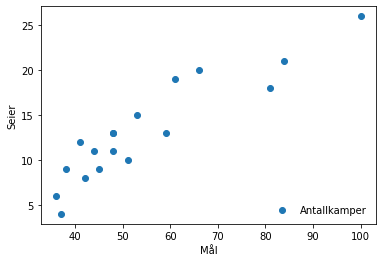

In [7]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')

#plotting the function:
ax.scatter(g['+'], g['V'],  label='Antallkamper')
ax.legend(loc='lower right',frameon=False)

In [8]:
y=g['V']
pd.DataFrame(y)

,V
0,26
1,21
2,18
3,20
4,19
5,15
6,13
7,13
8,13
9,11


In [9]:
x=pd.DataFrame(np.log(g['+']))
x['intercept']=1
x

,+,intercept
0,4.605170,1
1,4.430817,1
2,4.394449,1
3,4.189655,1
4,4.110874,1
5,3.970292,1
6,3.871201,1
7,3.871201,1
8,4.077537,1
9,3.871201,1


In [10]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     104.7
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.00e-08
Time:                        12:16:54   Log-Likelihood:                -38.150
No. Observations:                  18   AIC:                             80.30
Df Residuals:                      16   BIC:                             82.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
+             18.0192      1.761     10.231      0.0

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
res.params

+            18.019202
intercept   -58.052069
dtype: float64

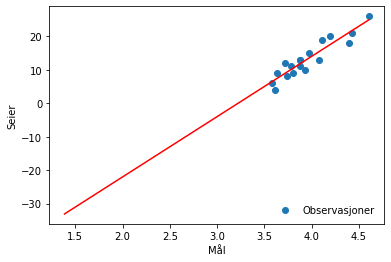

In [12]:
fig,ax=plt.subplots()

x=np.linspace(min(np.log(g['V'])), max(np.log(g['+'])), 50)


regression_line=res.params['intercept']+res.params['+']*x


ax.plot(x, regression_line,color='red')

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')



#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [ ]:
#gjort en regrisjonsanalyse av mål/seier og vi ser at det er en korelasjon mellom antall mål og kamper vunnet,ikke alltid men som oftest
